# Contextualização

Algumas empresas gostariam de saber quem são as demais empresas em um determinado mercado (população) que tem maior probabilidade se tornarem seus próximos clientes. Ou seja, a sua solução deve encontrar no mercado quem são os leads mais aderentes dado as características dos clientes presentes no portfólio do usuário.

Além disso, sua solução deve ser agnóstica ao usuário. Qualquer usuário com uma lista de clientes que queira explorar esse mercado pode extrair valor do serviço.

---

Para o desafio, deverão ser consideradas as seguintes bases:

Mercado: Base com informações sobre as empresas do Mercado a ser considerado. Portfolio 1: Ids dos clientes da empresa 1 Portfolio 2: Ids dos clientes da empresa 2 Portfolio 3: Ids dos clientes da empresa 3

Obs: todas as empresas(ids) dos portfolios estão contidos no Mercado(base de população).

As bases de portfólio poderão ser utilizadas para testar a aderência da solução. Além disso, se a equipe desejar, poderá simular portfólios por meio de amostragens no mercado.

[Descrição de variáveis](https://s3-us-west-1.amazonaws.com/codenation-challenges/ml-leads/features_dictionary.pdf)

# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set()

# Fontes de dados

In [3]:
df_market = pd.read_parquet('../data/estaticos_market.parquet')

In [ ]:
df_p1 = pd.read_csv('../data/estaticos_portfolio1.csv')
df_p2 = pd.read_csv('../data/estaticos_portfolio2.csv')
df_p3 = pd.read_csv('../data/estaticos_portfolio3.csv')

# Descrição dos dados

Tirando uma amostra dos dados:

In [ ]:
df_market.drop('Unnamed: 0', axis=1, inplace=True)
df_market.sample(5)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
25396,437e3cae941abb40f649ecad20133eefaca5ecccbb8ccd...,False,EMPRESA PUBLICA,AM,ENTIDADES EMPRESARIAIS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,44.230137,> 20,False,False,False,False,False,2

As estatísticas descritivas:

In [ ]:
descr = df_market.describe(include='all').round(2).T
descr['cv'] = descr['std']/(descr['mean']+.00001) # calcula o coef. de variação de Pearson

pct_miss = ((df_market.shape[0]-descr['count'])/df_market.shape[0])*100 # porcentagem de dados faltantes
descr['pct_missing'] = pct_miss
descr

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,cv,pct_missing
id,462298,462298,54df923fffc5bbef069e821dc30421b1f45a88c4cda69a...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
fl_matriz,462298,2,True,433232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
de_natureza_juridica,462298,67,EMPRESARIO INDIVIDUAL,295756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
sg_uf,462298,6,MA,127654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
natureza_juridica_macro,462298,7,OUTROS,320211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
de_ramo,462298,33,COMERCIO VAREJISTA,172404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
setor,460371,5,COMERCIO,211224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.416831
idade_empresa_anos,462298,NaN,NaN,NaN,9.95,9.62,0.02,2.76,6.7,14.47,106.43,0.966833,0
idade_emp_cat,462298,6,1 a 5,138580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
fl_me,462298,2,False,461083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Os tipos de dados. Aqui, nota-se que a maioria dos tipos são numéricos, o que deve facilitar a parte de *feature engineering* mais adiante.

In [ ]:
df_market.dtypes

id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                                            bool
fl_telefone                    

## Dados faltantes

Abaixo, a proporção de dados faltantes para o total, para todas as features. Percebe-se que em muitas features, mais da metade das observações são faltantes. Além disso, as correlações entre dados faltantes mais fortes presentes nos dados. A ocorrência de altas correlações indica que os dados faltantes partiram de um mesmo processo gerador dos dados. Isto é um problema pois quebra pressupostos de modelos de regressão linear.

In [ ]:
df_market_na = df_market.isna()
df_market_na_corr = df_market_na.sample(frac=.1).corr()
df_market_na_corr.unstack().dropna().sort_values()

qt_socios_masculino        qt_socios_feminino    -0.214695
qt_socios_feminino         qt_socios_masculino   -0.214695
fl_optante_simei           idade_media_socios    -0.129683
                           idade_minima_socios   -0.129683
fl_optante_simples         idade_maxima_socios   -0.129683
                                                    ...   
qt_coligados_agropecuaria  qt_socios_coligados    1.000000
                           qt_coligados_matriz    1.000000
                           qt_coligados_ativo     1.000000
                           qt_coligados_inapta    1.000000
tx_rotatividade            tx_rotatividade        1.000000
Length: 24649, dtype: float64

Primeiramente, vamos remover as colunas com mais de 90% dos dados faltantes, a partir do entendimento que eles adicionam pouca informação em esforços futuros de modelagem.

In [ ]:
df_market = df_market.loc[:,pct_miss<90]

In [ ]:
df_market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,grau_instrucao_macro_escolaridade_media,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,NaN,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,6.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,220.477778,536.366667,57.3,57.3,536.366667,220.477778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,5.0,0.0,21809443.0,3.634907e+06,13188096.0,210000.0,22019443.0,3.669907e+06,13188096.0,210000.0,0.0,0.0,0.0,0.0,0.0,6.0,21809443.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,119.0,26.0,100.0,0.0,25.0,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,0.0,0.0,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,468.93,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000

Há um grande número de dados faltantes em torno das informações respectivas às quantidades de empresas coligadas e suas características. Para tanto, parece razoável preencher os dados faltantes com zero.

In [ ]:
cols = df_market.columns[df_market.columns.str.contains('qt_coligados')]
df_market[cols] = df_market[cols].fillna(0)

Para as demais variáveis numéricas, os dados faltantes serão substituídos pela média dos dados, agrupadas UF e atividade.

In [ ]:
def fill_groupmeans(col: pd.Series, by: list):
  res = col.fillna(df_market.groupby(by)[col.name].transform('mean'))
  return res

In [ ]:
fill_groupmeans(df_market['faturamento_est_coligados'], by=['sg_uf','nm_segmento'])

0         2.180944e+07
1         2.950323e+07
2         4.949439e+08
3         9.814962e+06
4         2.842727e+07
              ...     
462293    1.129038e+08
462294    8.236662e+07
462295    6.181920e+05
462296    1.738300e+08
462297    3.693314e+08
Name: faturamento_est_coligados, Length: 462298, dtype: float64

# Inspeção visual

Comparando duas features quaisquer graficamente:

In [ ]:
@interact
def myplot(Y = [*df_market.columns], X=[*df_market.columns], by=[*df_market.columns], smp=2000):
    plt.clf()
    sns.boxplot(x=X, y=Y, hue=by, data=df_market.sample(smp))

## Características das empresas

Text(0, 0.5, 'Anos')

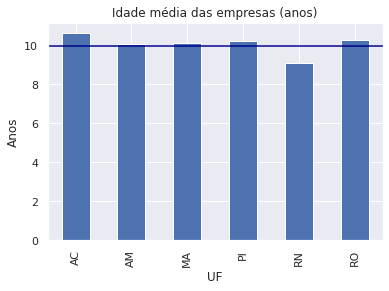

In [ ]:
# Idade média das empresas em anos

ax = df_market.groupby('sg_uf')['idade_empresa_anos'].mean().plot(kind='bar', title='Idade média das empresas (anos)')
plt.axhline(df_market['idade_empresa_anos'].mean(), color='darkblue')
ax.set_xlabel('UF')
ax.set_ylabel('Anos')

Text(0.5, 1.0, 'Idade média das empresas por setor')

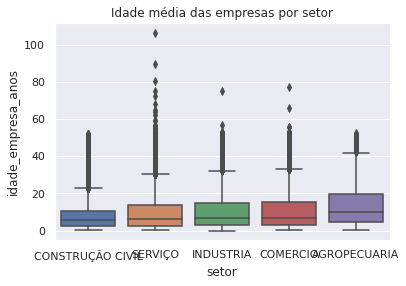

In [ ]:
# Idade média das empresas por setor

sns.boxplot(x='setor', y='idade_empresa_anos', data=df_market)
plt.title('Idade média das empresas por setor')

In [ ]:
# Empresas por faixa de faturamento

df_market.groupby('de_faixa_faturamento_estimado')['id'].count().sort_values()

de_faixa_faturamento_estimado
ACIMA DE 1 BILHAO DE REAIS                      21
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS        27
DE R$ 300.000.000,01 A R$ 500.000.000,00        48
DE R$ 100.000.000,01 A R$ 300.000.000,00       253
DE R$ 30.000.000,01 A R$ 100.000.000,00        871
SEM INFORMACAO                                1173
DE R$ 10.000.000,01 A R$ 30.000.000,00        1445
DE R$ 4.800.000,01 A R$ 10.000.000,00         2150
DE R$ 1.500.000,01 A R$ 4.800.000,00         10153
DE R$ 360.000,01 A R$ 1.500.000,00           46225
ATE R$ 81.000,00                             98558
DE R$ 81.000,01 A R$ 360.000,00             273861
Name: id, dtype: int64

Text(0.5, 1.0, 'Relação entre faturamento e quadro de empregados')

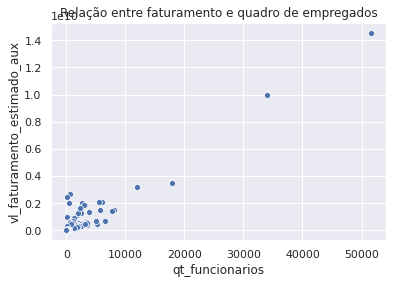

In [ ]:
# Relação entre faturamento e quadro de empregados

sns.scatterplot(x='qt_funcionarios', y='vl_faturamento_estimado_aux', data=df_market)
ax.set_ylabel('Funcionários')
ax.set_ylabel('Faturamento estimado (R$)')
plt.title('Relação entre faturamento e quadro de empregados')

In [ ]:
df_market.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_simples_irregular,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,grau_instrucao_macro_escolaridade_media,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,True,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,False,NaN,LESTE POTIGUAR,NATAL,True,2.0,2.0,0.0,44.0,47.0,41.0,2.0,2.0,NaN,6.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,220.477778,536.366667,57.3,57.3,536.366667,220.477778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,1.0,5.0,0.0,21809443.0,3.634907e+06,13188096.0,210000.0,22019443.0,3.669907e+06,13188096.0,210000.0,0.0,0.0,0.0,0.0,0.0,6.0,21809443.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,119.0,26.0,100.0,0.0,25.0,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,NaN,0.0,0.0,NaN,PI,CINZA,ATE 1 ANO,9.0,BAIXA,False,468.93,CENTRO NORTE PIAUIENSE,TERESINA,True,1.0,1.0,0.0,27.0,27.0,27.0,1.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"DE R$ 81.000